In [1]:
from Extract_ephys_from_struct import ExtractEphysData, calculate_mean_responses, ResponseDistributionPlotter

#from plotting_functions import plot_spike_distribution_boxplots, plot_spike_distribution, plot_psth, plot_raster

#now test the class
#initialize the class
EED = ExtractEphysData('/Users/cresp1el/Documents/MATLAB/lmc_20ms_data.mat')

#test the methods of the class
EED.load_matfiles_printdata()

#test the extract_ephys_data method
EED.extract_ephys_data('Lmc_opsin', 'lmc_ch_1_3094_rec1', 'cid134')

#what are the group names?

EED.group_names

dict_keys(['Lmc_noopsin', 'Lmc_opsin'])
For the group Lmc_noopsin there are 2 mice
For the recording lmc_noch_1_3096_rec1 there are 5 cells
For the recording lmc_noch_1_3096_rec2 there are 4 cells
For the group Lmc_opsin there are 3 mice
For the recording lmc_ch_1_3094_rec1 there are 7 cells
For the recording lmc_ch_1_3094_rec2 there are 3 cells
For the recording lmc_ch_2_3093_rec1 there are 4 cells


dict_keys(['Lmc_noopsin', 'Lmc_opsin'])

In [3]:
test = calculate_mean_responses(EED)

In [21]:
print(test.keys()) #these are the group names
print(test['Lmc_opsin'].keys()) #these are the pre and post epoch names for each group
print(test['Lmc_opsin']['Pre']) #these are the cell names for each epoch


dict_keys(['Lmc_noopsin', 'Lmc_opsin'])
dict_keys(['Pre', 'Post'])
[{'Recording': 'lmc_ch_1_3094_rec1', 'CellID': 'cid134', 'Pre_Zero': 0.0975609756097561, 'Pre_Low': 0.13846153846153847, 'Pre_Mid': 0.17777777777777778, 'Pre_Max': 0.15789473684210525, 'Pre_Pooled': 0.158311345646438, 'Post_Zero': 0.12962962962962962, 'Post_Low': 0.06779661016949153, 'Post_Mid': 0.03731343283582089, 'Post_Max': 0.12903225806451613, 'Post_Pooled': 0.07712765957446809}, {'Recording': 'lmc_ch_1_3094_rec1', 'CellID': 'cid145', 'Pre_Zero': 0.37398373983739835, 'Pre_Low': 0.34615384615384615, 'Pre_Mid': 0.4444444444444444, 'Pre_Max': 0.4824561403508772, 'Pre_Pooled': 0.42216358839050133, 'Post_Zero': 0.39814814814814814, 'Post_Low': 0.2542372881355932, 'Post_Mid': 0.19402985074626866, 'Post_Max': 0.25806451612903225, 'Post_Pooled': 0.23404255319148937}, {'Recording': 'lmc_ch_1_3094_rec1', 'CellID': 'cid148', 'Pre_Zero': 0.12195121951219512, 'Pre_Low': 0.1, 'Pre_Mid': 0.02962962962962963, 'Pre_Max': 0.07894736

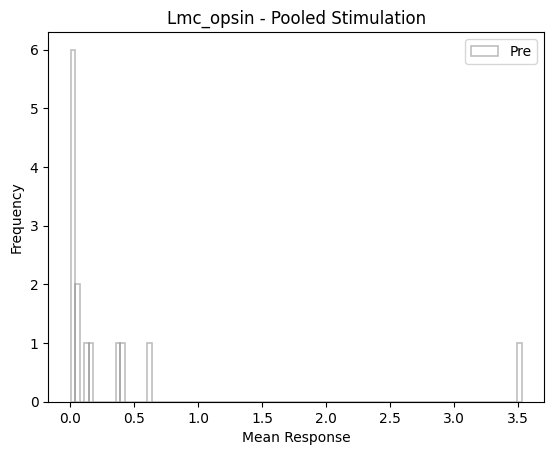

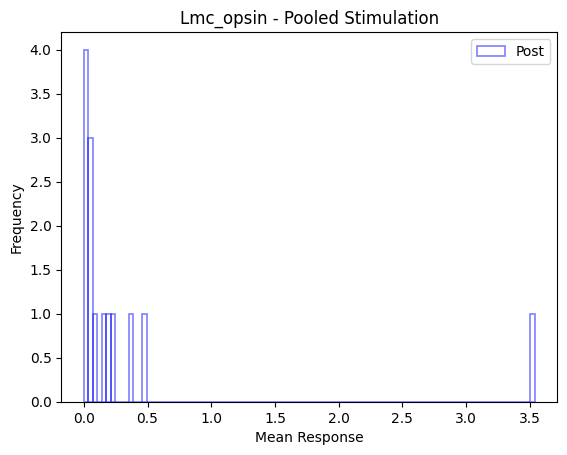

In [5]:
# Assuming `mean_responses_data` is the dictionary obtained from the calculate_mean_responses function
plotter = ResponseDistributionPlotter(test)
plotter.plot_distribution('Lmc_opsin', 'Pre', 'Pooled', bins=100, overlay=True) 
plotter.plot_distribution('Lmc_opsin', 'Post', 'Pooled', bins=100, overlay=True)

In [ ]:

# plotter.plot_distribution('Lmc_opsin', epoch=None, stim_level='Zero', overlay=True)
#plot the distribution for pre and post stim levels separately
plotter.plot_distribution('Lmc_opsin', epoch='Pre', stim_level='Zero', overlay=True)
plotter.plot_distribution('Lmc_opsin', epoch='Post', stim_level='Zero', overlay=True)

# Plotting 'Pre' and 'Post' distributions on top of each other by setting overlay=True 
#loop over the 'Zero', 'Low', 'Mid', 'Max', or 'Pooled' stim levels to plot the distributions for each stim level
for stim_level in ['Zero', 'Low', 'Mid', 'Max', 'Pooled']: 
    plotter.plot_distribution('Lmc_opsin', epoch=None, stim_level=stim_level, overlay=True)
    
    

In [ ]:
#plot the pre and post for the low separated 
plotter.plot_distribution('Lmc_opsin', epoch='Pre', stim_level='Low', bins=100)
plotter.plot_distribution('Lmc_opsin', epoch='Post', stim_level='Low', bins=100)

#plot the pre and post for the high separated
plotter.plot_distribution('Lmc_opsin', epoch='Pre', stim_level='Max', bins=100)
plotter.plot_distribution('Lmc_opsin', epoch='Post', stim_level='Max', bins=100)


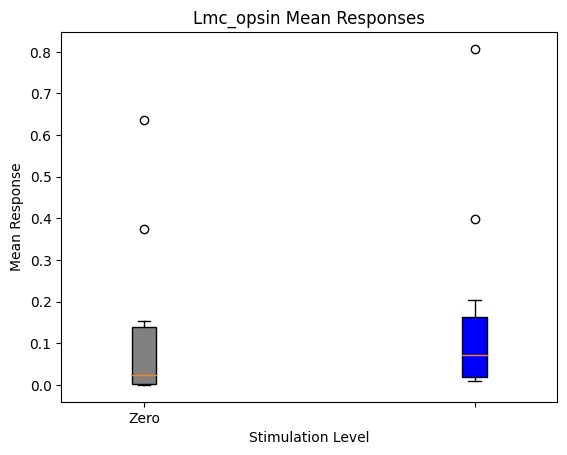

In [29]:
import matplotlib.pyplot as plt
from collections import defaultdict

def plot_box_and_whisker(data, group_name, stim_levels=['Zero', 'Low', 'Mid', 'Max', 'Pooled'], epoch='both', overlay=False):
    """
    Plots a box and whisker plot of the mean responses for the specified group and stimulation levels.

    Parameters:
    - data (dict): The data dictionary containing the mean responses.
    - group_name (str): The name of the group to plot data for.
    - stim_levels (list or str): The stimulation levels to plot data for (e.g., ['Zero', 'Low', 'Mid', 'Max', 'Pooled'] or 'Zero'). Default is all levels.
    - epoch (str): The epoch to plot data for ('Pre', 'Post', or 'both'). Default is 'both'.
    - overlay (bool): Whether to overlay the 'Pre' and 'Post' data on a single plot. Default is False.
    """

    if isinstance(stim_levels, str):
        stim_levels = [stim_levels]

    # Get the mean responses for the specified group
    group_data = data[group_name]

    # Get the data to plot
    data_to_plot = defaultdict(list)
    epochs_to_plot = ['Pre', 'Post'] if epoch == 'both' else [epoch]
    for epoch in epochs_to_plot:
        for stim_level in stim_levels:
            stim_data = [unit_data[f'{epoch}_{stim_level}'] for unit_data in group_data[epoch]]
            data_to_plot[epoch].append(stim_data)

    # Create a new figure
    plt.figure()

    # Create a box plot for each epoch
    colors = {'Pre': 'grey', 'Post': 'blue'}
    for i, (epoch, stim_data) in enumerate(data_to_plot.items()):
        position = range(i * (len(stim_levels) + 1) + 1, (i + 1) * (len(stim_levels) + 1))
        bp = plt.boxplot(stim_data, positions=position, labels=stim_levels if i == 0 else [''] * len(stim_levels), patch_artist=True)
        
        # Set colors
        for box in bp['boxes']:
            box.set_facecolor(colors[epoch])
        
    # Set the plot title and labels
    plt.title(f'{group_name} Mean Responses')
    plt.ylabel('Mean Response')
    plt.xlabel('Stimulation Level')
    
    # Adding epoch labels
    if epoch == 'both':
        mid_point = len(stim_levels) / 2
        plt.text(mid_point, plt.gca().get_ylim()[1], 'Pre', ha='center', va='center', fontsize=12, fontweight='bold')
        plt.text(len(stim_levels) + 1 + mid_point, plt.gca().get_ylim()[1], 'Post', ha='center', va='center', fontsize=12, fontweight='bold')

    # Show the plot
    if not overlay:
        plt.show()

# Usage example:
# Assuming `data_dict` is your data dictionary obtained from `calculate_mean_responses` function
plot_box_and_whisker(test, 'Lmc_opsin', 'Zero', 'both')





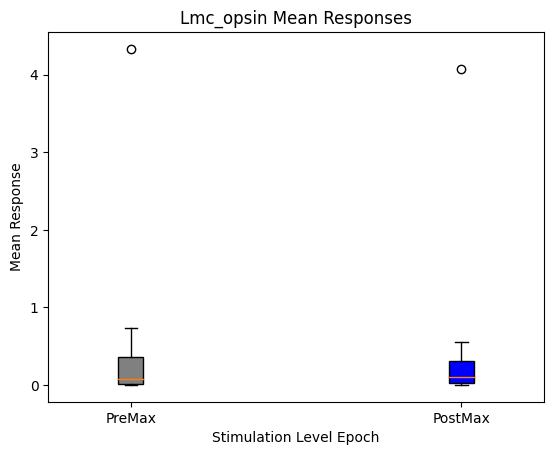

In [34]:
import matplotlib.pyplot as plt
from collections import defaultdict

def plot_box_and_whisker(data, group_name, stim_levels=['Zero', 'Low', 'Mid', 'Max', 'Pooled'], epoch='both', overlay=False):
    """
    Plots a box and whisker plot of the mean responses for the specified group and stimulation levels.

    Parameters:
    - data (dict): The data dictionary containing the mean responses.
    - group_name (str): The name of the group to plot data for.
    - stim_levels (list or str): The stimulation levels to plot data for (e.g., ['Zero', 'Low', 'Mid', 'Max', 'Pooled'] or 'Zero'). Default is all levels.
    - epoch (str): The epoch to plot data for ('Pre', 'Post', or 'both'). Default is 'both'.
    - overlay (bool): Whether to overlay the 'Pre' and 'Post' data on a single plot. Default is False.
    """

    if isinstance(stim_levels, str):
        stim_levels = [stim_levels]

    # Get the mean responses for the specified group
    group_data = data[group_name]

    # Get the data to plot
    data_to_plot = defaultdict(list)
    epochs_to_plot = ['Pre', 'Post'] if epoch == 'both' else [epoch]
    for epoch in epochs_to_plot:
        for stim_level in stim_levels:
            stim_data = [unit_data[f'{epoch}_{stim_level}'] for unit_data in group_data[epoch]]
            data_to_plot[epoch].append(stim_data)

    # Create a new figure
    plt.figure()

    # Create a box plot for each epoch
    colors = {'Pre': 'grey', 'Post': 'blue'}
    for i, (epoch, stim_data) in enumerate(data_to_plot.items()):
        position = range(i * (len(stim_levels) + 1) + 1, (i + 1) * (len(stim_levels) + 1))
        labels = [f'{epoch}{level}' for level in stim_levels]
        bp = plt.boxplot(stim_data, positions=position, labels=labels, patch_artist=True)
        
        # Set colors
        for box in bp['boxes']:
            box.set_facecolor(colors[epoch])
        
    # Set the plot title and labels
    plt.title(f'{group_name} Mean Responses')
    plt.ylabel('Mean Response')
    plt.xlabel('Stimulation Level Epoch')
    
    # Show the plot
    if not overlay:
        plt.show()



# Usage example:
# Assuming `data_dict` is your data dictionary obtained from `calculate_mean_responses` function
plot_box_and_whisker(test, 'Lmc_opsin', 'Max', 'both')


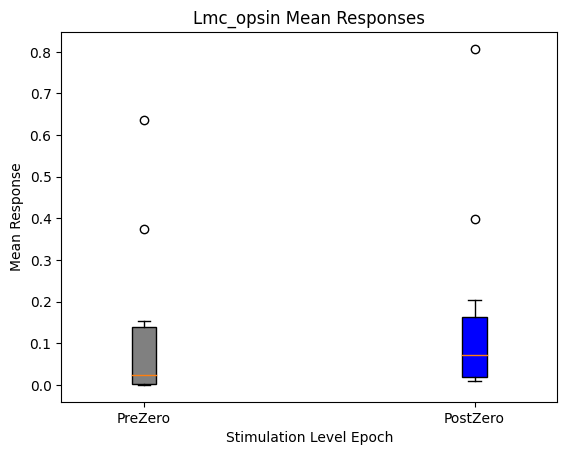

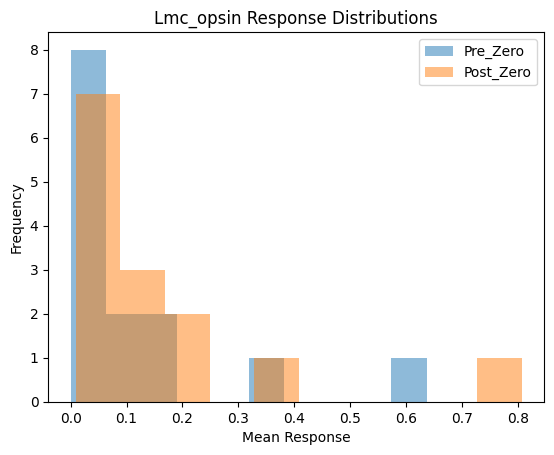

In [35]:
import matplotlib.pyplot as plt
from collections import defaultdict

def plot_box_and_whisker(data, group_name, stim_levels=['Zero', 'Low', 'Mid', 'Max', 'Pooled'], epoch='both', overlay=False, plot_hist=False):
    """
    Plots a box and whisker plot of the mean responses for the specified group and stimulation levels.

    Parameters:
    - data (dict): The data dictionary containing the mean responses.
    - group_name (str): The name of the group to plot data for.
    - stim_levels (list or str): The stimulation levels to plot data for (e.g., ['Zero', 'Low', 'Mid', 'Max', 'Pooled'] or 'Zero'). Default is all levels.
    - epoch (str): The epoch to plot data for ('Pre', 'Post', or 'both'). Default is 'both'.
    - overlay (bool): Whether to overlay the 'Pre' and 'Post' data on a single plot. Default is False.
    - plot_hist (bool): Whether to plot the histogram distribution. Default is False.
    """

    if isinstance(stim_levels, str):
        stim_levels = [stim_levels]

    # Get the mean responses for the specified group
    group_data = data[group_name]

    # Get the data to plot
    data_to_plot = defaultdict(list)
    epochs_to_plot = ['Pre', 'Post'] if epoch == 'both' else [epoch]
    for epoch in epochs_to_plot:
        for stim_level in stim_levels:
            stim_data = [unit_data[f'{epoch}_{stim_level}'] for unit_data in group_data[epoch]]
            data_to_plot[epoch].append(stim_data)

    # Create a new figure
    plt.figure()

    # Create a box plot for each epoch
    colors = {'Pre': 'grey', 'Post': 'blue'}
    for i, (epoch, stim_data) in enumerate(data_to_plot.items()):
        position = range(i * (len(stim_levels) + 1) + 1, (i + 1) * (len(stim_levels) + 1))
        labels = [f'{epoch}{level}' for level in stim_levels]
        bp = plt.boxplot(stim_data, positions=position, labels=labels, patch_artist=True)
        
        # Set colors
        for box in bp['boxes']:
            box.set_facecolor(colors[epoch])
        
    # Set the plot title and labels
    plt.title(f'{group_name} Mean Responses')
    plt.ylabel('Mean Response')
    plt.xlabel('Stimulation Level Epoch')
    
    # Plot the histogram distribution if specified
    if plot_hist:
        plt.figure()
        for epoch in epochs_to_plot:
            for stim_level in stim_levels:
                stim_data = [unit_data[f'{epoch}_{stim_level}'] for unit_data in group_data[epoch]]
                plt.hist(stim_data, alpha=0.5, label=f'{epoch}_{stim_level}')
        plt.xlabel('Mean Response')
        plt.ylabel('Frequency')
        plt.title(f'{group_name} Response Distributions')
        plt.legend()
    
    # Show the plot
    if not overlay:
        plt.show()

# Usage example:
# Assuming `data_dict` is your data dictionary obtained from `calculate_mean_responses` function
plot_box_and_whisker(test, 'Lmc_opsin', 'Zero', 'both', plot_hist=True)


In [42]:
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

def plot_box_and_whisker_with_histogram(data, group_name, stim_levels=['Zero', 'Low', 'Mid', 'Max', 'Pooled'], epoch='both', overlay=False, plot_hist=False):
    # Define colors for each epoch
    colors = {'Pre': 'grey', 'Post': 'blue', 'both': 'purple'}
    
    # Create a dictionary to store data for each stimulation level
    stim_data_dict = defaultdict(lambda: defaultdict(list))
    
    # Define epochs to loop through based on the input epoch parameter
    epochs_to_loop = ['Pre', 'Post'] if epoch == 'both' else [epoch]
    
    # Loop through the data and extract the relevant values
    for epoch in epochs_to_loop:
        for unit_data in data[group_name][epoch]:
            for stim_level in stim_levels:
                stim_data_dict[epoch]['Pre_' + stim_level].append(unit_data['Pre_' + stim_level])
                stim_data_dict[epoch]['Post_' + stim_level].append(unit_data['Post_' + stim_level])
    
    # Create a new figure for the plot
    fig, ax = plt.subplots()
    
    # Loop through each epoch and plot the data
    for epoch_index, (epoch_key, stim_data) in enumerate(stim_data_dict.items()):
        # Create lists to store the data for the box plot and the labels for the x-axis
        box_plot_data = []
        x_labels = []
        
        # Loop through each stimulation level and add the data to the lists
        for stim_level in stim_levels:
            box_plot_data.append(stim_data['Pre_' + stim_level])
            box_plot_data.append(stim_data['Post_' + stim_level])
            x_labels.append('Pre' + stim_level)
            x_labels.append('Post' + stim_level)
        
        # Create the box plot
        ax.boxplot(box_plot_data, positions=range(epoch_index * (len(stim_levels) + 1) * 2, (epoch_index + 1) * (len(stim_levels) + 1) * 2 - 1), widths=0.6)
        
        # Plot the histograms if the plot_hist parameter is True
        if plot_hist:
            for stim_index, stim_level_data in enumerate(box_plot_data):
                position = epoch_index * (len(stim_levels) + 1) * 2 + stim_index
                hist_data, bins = np.histogram(stim_level_data, bins=10)
                ax.hist(stim_level_data, bins=bins, orientation='horizontal', color=colors[epoch_key], alpha=0.5, position=position)
    
    # Set the labels for the x-axis
    ax.set_xticks(range(0, (len(stim_levels) + 1) * 2 * len(stim_data_dict), 2))
    ax.set_xticklabels(x_labels, rotation=90)
    
    # Set the labels for the y-axis and the title
    ax.set_ylabel('Response')
    ax.set_title(f'{group_name} Response by Stimulation Level and Epoch')
    
    # Display the plot
    plt.show()

# Usage example:
# Assuming `data_dict` is your data dictionary obtained from `calculate_mean_responses` function
plot_box_and_whisker_with_histogram(test, 'Lmc_opsin', 'Zero', 'both', plot_hist=True)



KeyError: 'both'